Accuracy: 0.9074074074074074
Precision: 0.9244851258581236
Recall: 0.9047619047619048
F1 Score: 0.9092796092796093


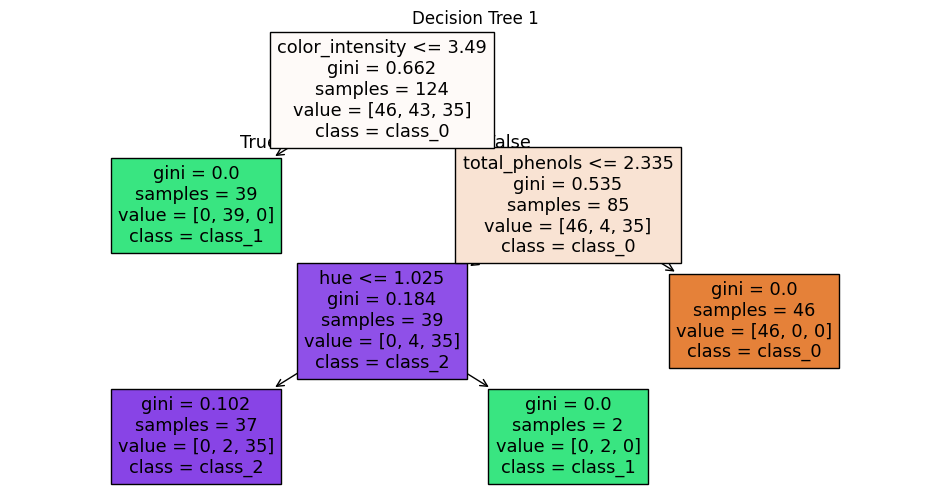

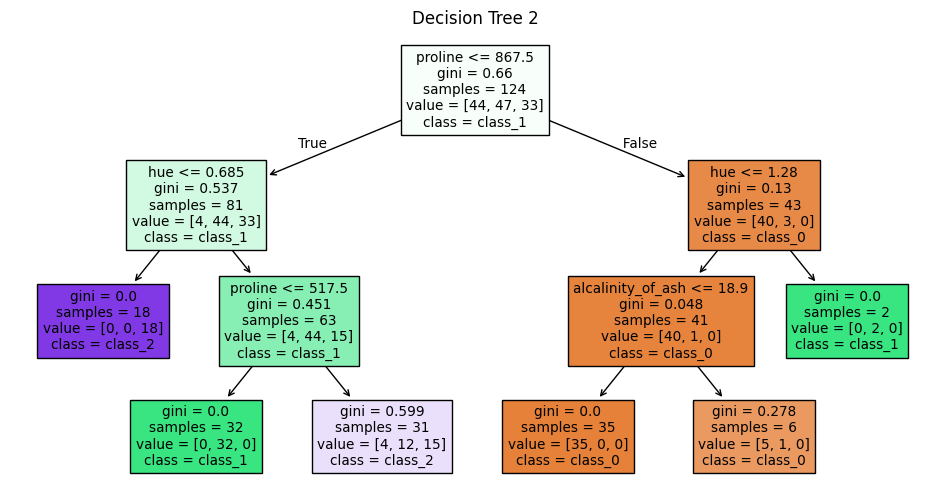

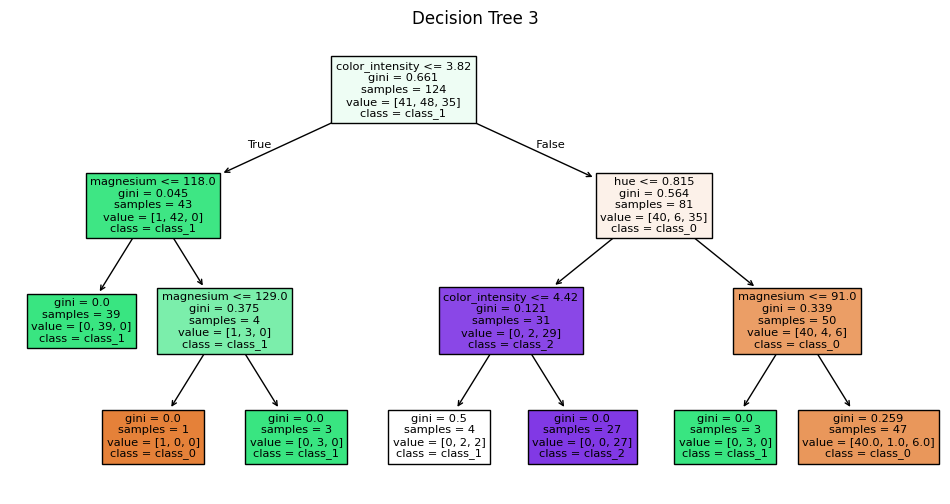

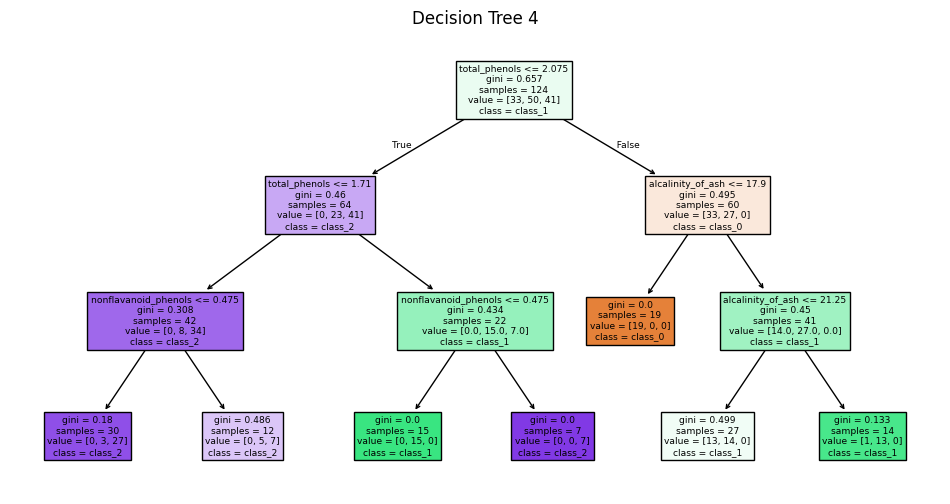

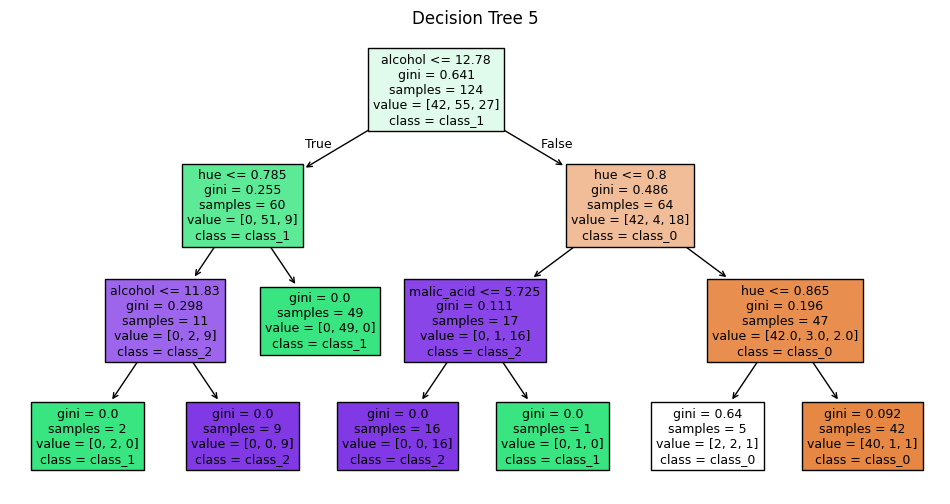

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load dataset
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names
class_names = data.target_names

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class RandomForestScratch:
    def __init__(self, n_trees=5, max_features='sqrt', max_depth=None):
        self.n_trees = n_trees
        self.max_features = max_features
        self.max_depth = max_depth
        self.trees = []

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def _feature_sample(self, X):
        n_features = X.shape[1]
        if self.max_features == 'sqrt':
            size = int(np.sqrt(n_features))
        elif isinstance(self.max_features, int):
            size = self.max_features
        else:
            size = n_features
        feature_indices = np.random.choice(n_features, size=size, replace=False)
        return feature_indices

    def fit(self, X, y):
        self.trees = []
        self.feature_indices_list = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            X_sample, y_sample = self._bootstrap_sample(X, y)
            feature_indices = self._feature_sample(X_sample)
            self.feature_indices_list.append(feature_indices)
            tree.fit(X_sample[:, feature_indices], y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([
            tree.predict(X[:, features])
            for tree, features in zip(self.trees, self.feature_indices_list)
        ])
        # Majority vote
        y_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=tree_preds)
        return y_pred

# Train model
rf = RandomForestScratch(n_trees=5, max_depth=3)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

# Plot individual decision trees
for i, (tree, features) in enumerate(zip(rf.trees, rf.feature_indices_list)):
    plt.figure(figsize=(12, 6))
    plot_tree(tree,
              feature_names=[feature_names[j] for j in features],
              class_names=class_names,
              filled=True)
    plt.title(f"Decision Tree {i+1}")
    plt.show()


In [2]:
df = pd.read_csv("/content/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
X = df.drop(columns="TenYearCHD")
y = df['TenYearCHD']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Accuracy: 0.8549528301886793
Precision: 0.9273907910271546
Recall: 0.5040322580645161
F1 Score: 0.46885295989815406


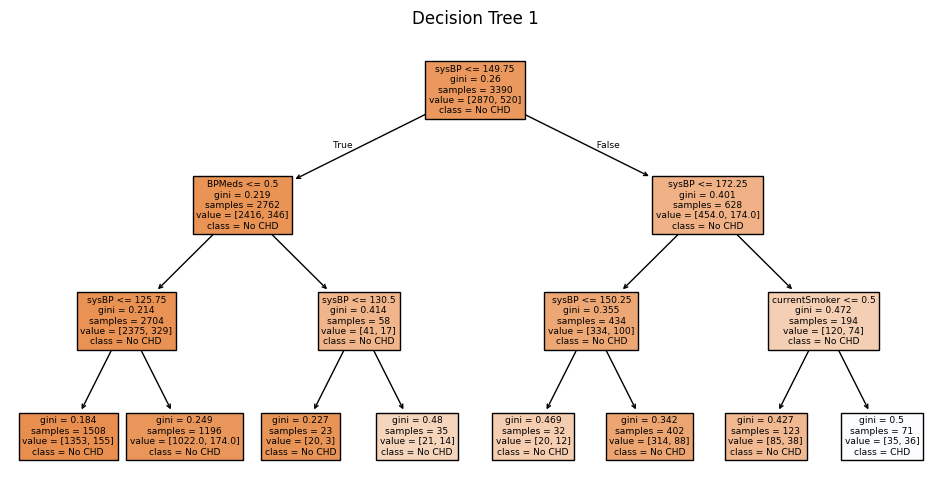

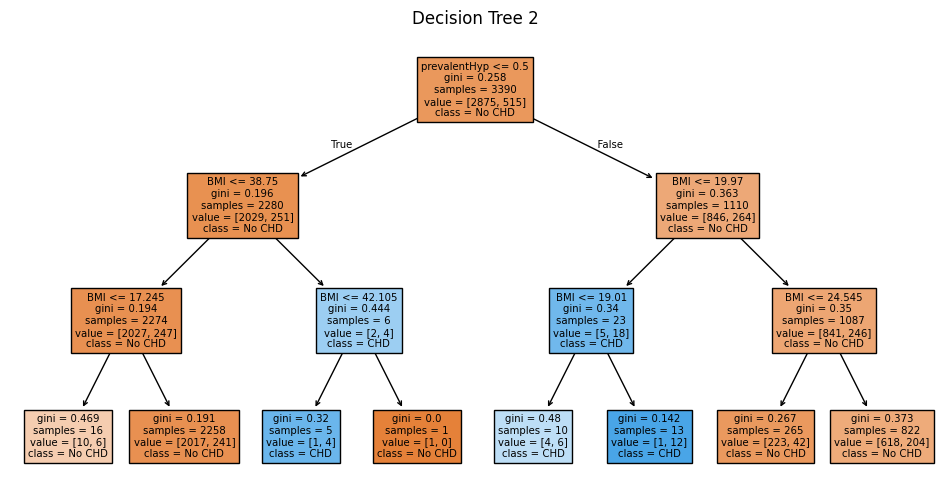

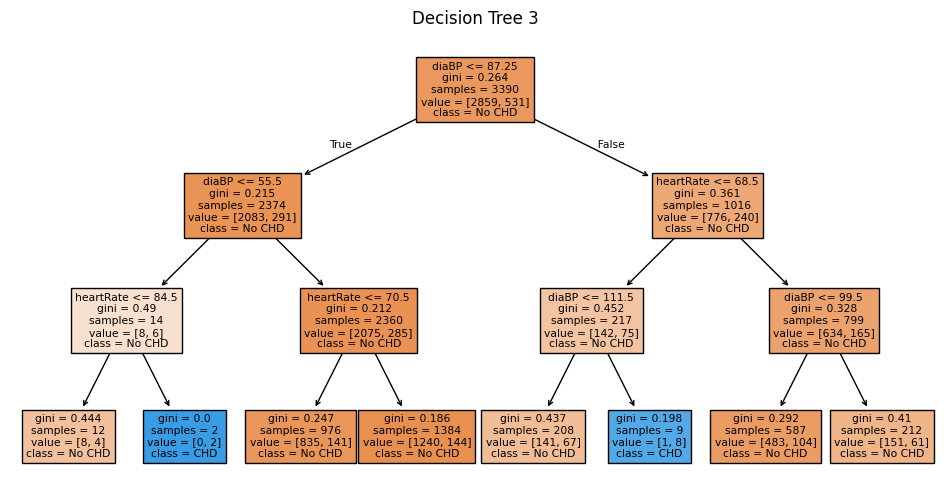

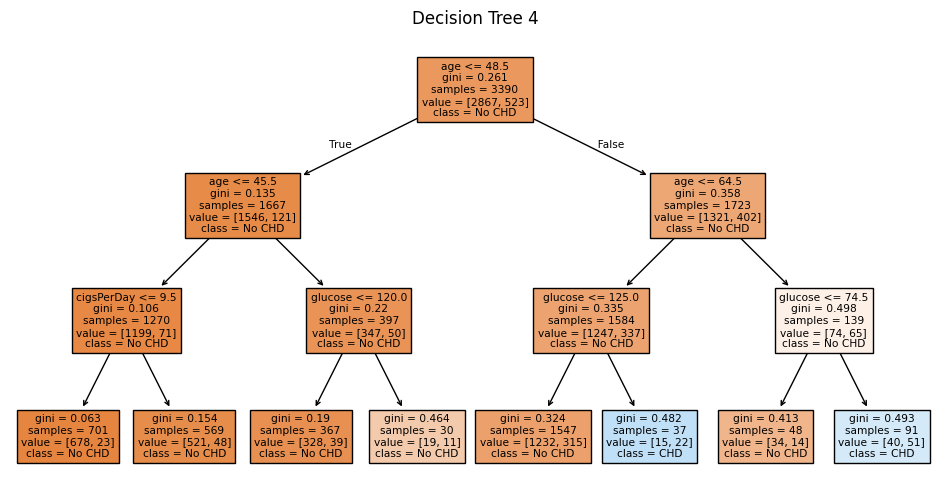

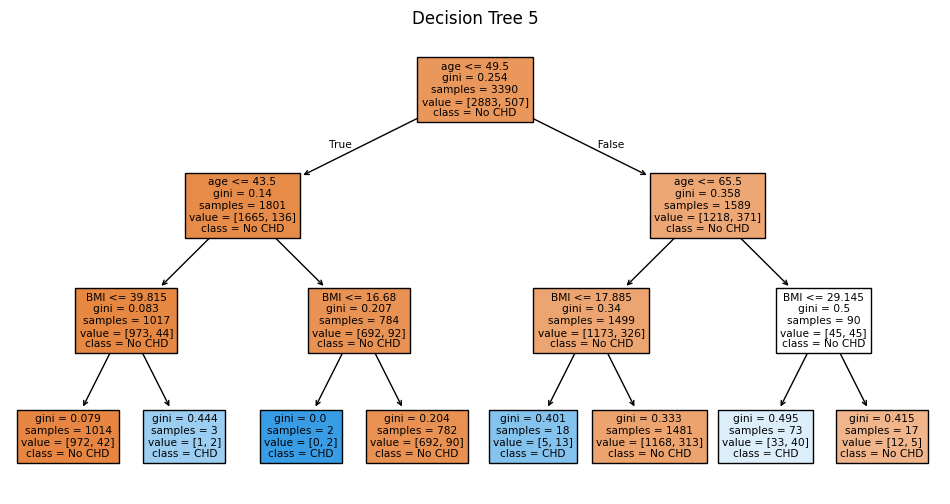

In [12]:
class RandomForestScratch:
    def __init__(self, n_trees=5, max_features='sqrt', max_depth=None):
        self.n_trees = n_trees
        self.max_features = max_features
        self.max_depth = max_depth
        self.trees = []

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        # Use positional indexing (.iloc) when X and y are pandas DataFrames/Series
        # to select rows based on integer positions generated by np.random.choice.
        # If X is a NumPy array, .iloc will still work correctly.
        return X.iloc[indices], y.iloc[indices]

    def _feature_sample(self, X):
        n_features = X.shape[1]
        if self.max_features == 'sqrt':
            size = int(np.sqrt(n_features))
        elif isinstance(self.max_features, int):
            size = self.max_features
        else:
            size = n_features
        # Ensure feature_indices are correctly applied to the DataFrame.
        # Selecting columns from a DataFrame using a list of integer indices works by default.
        feature_indices = np.random.choice(n_features, size=size, replace=False)
        return feature_indices

    def fit(self, X, y):
        self.trees = []
        self.feature_indices_list = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            X_sample, y_sample = self._bootstrap_sample(X, y)
            feature_indices = self._feature_sample(X_sample)
            self.feature_indices_list.append(feature_indices)
            # Select columns from the sampled DataFrame using the generated feature indices.
            # .iloc is used here to ensure positional indexing for columns.
            # While standard column indexing with integer lists often works, .iloc is more explicit
            # when dealing with integer-like column names or mixed types, although in this case,
            # X_sample.iloc[:, feature_indices] is the most robust way.
            tree.fit(X_sample.iloc[:, feature_indices], y_sample)
            self.trees.append(tree)


    def predict(self, X):
        tree_preds = []
        for tree, features in zip(self.trees, self.feature_indices_list):
            # Select columns from the input DataFrame X using the stored feature indices.
            # Again, use .iloc for positional indexing for columns.
            tree_preds.append(tree.predict(X.iloc[:, features]))

        tree_preds = np.array(tree_preds)
        # Majority vote
        y_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=tree_preds)
        return y_pred

# Train model
rf = RandomForestScratch(n_trees=5, max_depth=3)
rf.fit(x_train, y_train) # Note: using x_train and y_train from cell 6

# Predict
y_pred = rf.predict(x_test) # Note: using x_test from cell 6

# Metrics
# Ensure y_test is a pandas Series for compatibility with accuracy_score etc. if it's not already.
# If y_test is a Series, it's fine. If it was a NumPy array from the wine dataset,
# it would need to be explicitly converted or handled. However, train_test_split on pandas
# objects returns pandas objects, so this should be fine.
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=0)) # Added zero_division to handle cases with no positive predictions
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=0))     # Added zero_division
print("F1 Score:", f1_score(y_test, y_pred, average='macro', zero_division=0))       # Added zero_division

# Plot individual decision trees
# The feature_names and class_names were loaded from the wine dataset in cell 1.
# These variables are not suitable for plotting trees trained on the framingham dataset.
# You will need to generate appropriate feature names and class names for the framingham dataset.
# For now, commenting this out to avoid errors related to incompatible names.
# If you wish to plot, you would need:
# - Feature names from the columns of your framingham X DataFrame.
# - Class names from the unique values in your framingham y Series (TenYearCHD is binary, so ['0', '1'] or similar).

for i, (tree, features) in enumerate(zip(rf.trees, rf.feature_indices_list)):
    plt.figure(figsize=(12, 6))
    # Need to create new feature names list based on the columns of the DataFrame and feature indices
    current_feature_names = [X.columns[j] for j in features] # Use the original X DataFrame columns
    # Need to define class names for the target variable
    current_class_names = ['No CHD', 'CHD'] # Example names for binary classification
    plot_tree(tree,
              feature_names=current_feature_names,
              class_names=current_class_names,
              filled=True)
    plt.title(f"Decision Tree {i+1}")
    plt.show()